# Analyzing Restaurant Booking Trends with Boosting Algorithms

### Context


### Dataset Description

The dataset you will analyze contains a variety of attributes related to restaurant bookings. These details offer insights into customer preferences, booking patterns, and cancellation trends. Each booking record is characterized by several features:

### Booking Attributes:
- **id:** Unique identifier for each booking.
- **no_of_adults:** Number of adults per booking.
- **no_of_children:** Number of children per booking.
- **no_of_weekend_nights:** Number of weekend nights booked.
- **no_of_week_nights:** Number of weekday nights booked.
- **type_of_meal_plan:** Type of meal plan selected (e.g., bed and breakfast, all-inclusive).
- **required_car_parking_space:** Indicates if a parking space was required.
- **room_type_reserved:** Type of room reserved.
- **lead_time:** Number of days between the booking date and the arrival date.
- **arrival_year, arrival_month, arrival_date:** Date details for when the booking is scheduled.
- **market_segment_type:** The market segment from which the booking originated.
- **repeated_guest:** Flag indicating if the guest has booked before.
- **no_of_previous_cancellations:** Number of prior cancellations by the guest.
- **no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the guest.
- **avg_price_per_room:** Average price per room type.
- **no_of_special_requests:** Number of special requests made by the guest.
- **booking_status:** Status of the booking ( confirmed = 0, canceled = 1).

Your objective is to use boosting techniques to predict the 'booking_status' and analyze factors that influence booking behaviors. This analysis will help in identifying key trends that could influence policy adjustments, promotional strategies, and operational improvements.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./../data/booking.csv")
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [4]:
ZAdu_xChd = ['no_of_adults', 'no_of_children']
len(df[(df['no_of_adults'] == 0) & (df['no_of_children'] == 0)] )

16

In [5]:
df[(df['no_of_adults'] == 0) & (df['no_of_children'] == 0)][ZAdu_xChd].value_counts()

no_of_adults  no_of_children
0             0                 16
dtype: int64

In [6]:
df_booking_cancellations = df[df['booking_status'] == 1]
df_booking_cancellations.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1
5,5,0,2,2,5,0,0,2,215,2018,10,6,1,0,0,0,212.06,0,1
6,6,2,0,0,1,2,0,0,320,2018,8,18,0,0,0,0,115.00,1,1
11,11,2,2,0,1,0,0,3,69,2018,8,12,1,0,0,0,221.30,1,1
12,12,2,1,1,1,0,0,0,50,2018,4,30,1,0,0,0,121.50,1,1


In [7]:
df.booking_status

0        0
1        0
2        0
3        0
4        1
        ..
42095    1
42096    0
42097    0
42098    0
42099    0
Name: booking_status, Length: 42100, dtype: int64

<Axes: xlabel='arrival_month,booking_status'>

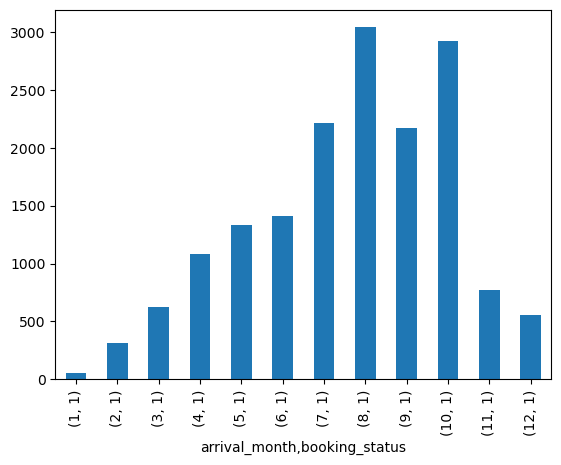

In [8]:
df_cancelled = df[df['booking_status'] == 1]
pd.DataFrame(df_cancelled.groupby(['arrival_month', 'booking_status']).count()).loc[:,'id'].plot(kind='bar')


<Axes: xlabel='arrival_month'>

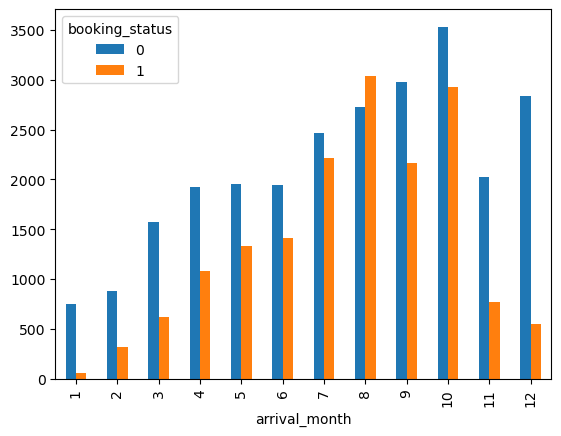

In [9]:
pd.pivot_table(index='arrival_month', columns='booking_status', data=df, aggfunc='size').plot(kind='bar')

# 3. Datatime Engineering

In [12]:
def process_arrival_date(df):
    data = {
        'Year': df['arrival_year'],
        'Month': df['arrival_month'],  # Note: 13 is an invalid month
        'Day': df['arrival_date']
    }
    df['date']= pd.to_datetime(data, errors='coerce')
    
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['week'] = df['date'].dt.isocalendar().week.astype(float)
    df['day'] = df['date'].dt.day
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['dayofyear'] = df['date'].dt.dayofyear

    
    return df
    


In [14]:
process_arrival_date(df)['date'].isnull().sum()

50

In [ ]:
df.Date.dt.dayofyear

In [15]:
df = df.drop(columns=['arrival_year','arrival_month', 'arrival_date'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   id                                    42100 non-null  int64         
 1   no_of_adults                          42100 non-null  int64         
 2   no_of_children                        42100 non-null  int64         
 3   no_of_weekend_nights                  42100 non-null  int64         
 4   no_of_week_nights                     42100 non-null  int64         
 5   type_of_meal_plan                     42100 non-null  int64         
 6   required_car_parking_space            42100 non-null  int64         
 7   room_type_reserved                    42100 non-null  int64         
 8   lead_time                             42100 non-null  int64         
 9   market_segment_type                   42100 non-null  int64         
 10

# Q4. Boosting Steps